# Аналитика крупного интернет-магазина

## Приоритизация гипотез, запуск A/B-теста и анализ результатов

Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.

Мне необходимо сделать приоритизацияю гипотез, запустить A/B-тест и проанализировать результаты.

## Часть 1. Приоритизация гипотез.

### Исходные данные

В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

### Задача

[•	Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.](#ice)

[•	Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.](#rice)

[•	Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.](#priority)


In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
'''Загружаем файл с гипотезами'''

path = 'D:\яндекс практикум\резюме\мои проекты\AB_test_internet_shop'
data_hyp = pd.read_csv(path + '\hypothesis.csv')
display(data_hyp)
print(data_hyp['Hypothesis'].unique())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'
 'Запустить собственную службу доставки, что сократит срок доставки заказов'
 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'
 'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар'
 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей'
 'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов'
 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию'
 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'
 'Запустить акцию, дающую скидку на товар в день рождения']


<a class="anchor" id="ice"></a>

In [6]:
'''Применим фреймворк ICE к списку гипотез'''

data_hyp['ICE'] = data_hyp['Impact'] * data_hyp['Confidence'] / data_hyp['Efforts']

In [7]:
display(data_hyp.sort_values(by='ICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00


### Вывод

Без учета влияния параметра Reach (охват пользователей, которых затронет изменение) самыми перспективными гипотезами являются:
- 8. Запустить акцию, дающую скидку на товар в день рождения;
- 0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- 7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

У этих гипотез высокое влияние на пользователей (Impact) и большая уверенность в пользе изменений (Confidence) и низкие затраты на проверку гипотезы.

У гипотез 8 и 0 низкий уровень охвата (Reach) поэтому после применения фреймворка RICE рейтинг поменяется.

<a class="anchor" id="rice"></a>

In [8]:
'''Применим фреймворк RICE к списку гипотез'''

data_hyp['RICE'] = data_hyp['Reach'] * data_hyp['Impact'] * data_hyp['Confidence'] / data_hyp['Efforts']
display(data_hyp.sort_values(by='RICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.00
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.00


In [9]:
data_hyp

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.00
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.00
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.00
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.00
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.00
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.00
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.00
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.20


In [10]:
data_hyp.reset_index()

,index,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.00
1,1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.00
2,2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.00
3,3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.00
4,4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.00
5,5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.00
6,6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.00
7,7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.00
8,8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.20


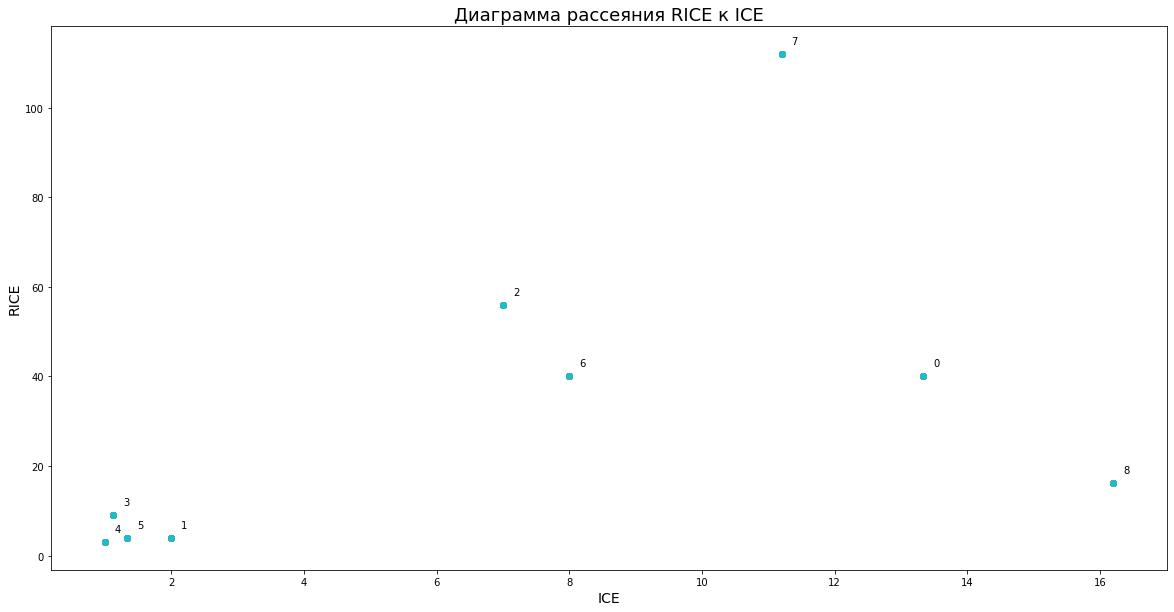

In [11]:
x = data_hyp['ICE'].values
y = data_hyp['RICE'].values
types = data_hyp.index.values

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(x, y)

ax.set_xlabel('ICE', fontsize=14)
ax.set_ylabel('RICE', fontsize=14)
ax.set_title('Диаграмма рассеяния RICE к ICE', fontsize=18)

for i, txt in enumerate(types):
    ax.annotate(txt, (x[i], y[i]), xytext=(10,10), textcoords='offset points')
    plt.scatter(x, y)


#### Из графика видно, что самые перспективные гипотезы - 7, 2, 6, 0. 

<a class="anchor" id="priority"></a>

### Вывод

С учетом параметра охвата пользователей, которых затронет изменение (Reach), самыми перспективными гипотезами являются:
- 7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- 2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
- 0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- 6. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

Самая перспективная гипотеза номер 8 фрейворка ICE только 5-я по результатам анализа гипотез фреймворком RICE за счет учета параметра охвата (Reach).

С учетом охвата пользователей гипотеза 7 является самой перспективной - высокие показатели охвата, влияния, уверенности и низкие затраты на проверку.

Степень влияния гипотезы 2 низкая, но за счет низкий затрат на проверку и высокого охвата и уверенности в изменениях тоже является интересной.

Гипотеза номер 0 по результатам анализа ICE и RICE считается стоящей, ее недостаток - маленький охват пользователей, которых коснутся изменения.


## Часть 2. Анализ A/B-теста.

### Исходные данные

Я провел A/B-тест и получил результаты, которые описаны в файлах orders.csv и visitors.csv.

### Задача

Проанализировать A/B-тест:

[1.	Построить график кумулятивной выручки по группам. Сделать выводы и предположения.](#1)

[2.	Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.](#2)

[3.	Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.](#3)

[4.	Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.](#4)

[5.	Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.](#5)

[6.	Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.](#6)

[7.	Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.](#7)

[8.	Построить точечный график стоимостей заказов. Сделать выводы и предположения.](#8)

[9.	Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.](#9)

[10.	Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.](#10)

[11.	Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.](#11)

[12.	Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.](#12)

[13.	Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.](#13)

[14.	Принять решение по результатам теста и объяснить его. ](#14)
    
    Варианты решений: 
    - 1. Остановить тест, зафиксировать победу одной из групп. 
    - 2. Остановить тест, зафиксировать отсутствие различий между группами. 
    - 3. Продолжить тест.


### План работы

1. Загрузить данные и подготовить их к анализу
2. Выполнить анализ, построить графики согласно задачам.
3. Сделать общий вывод.

In [12]:
orders = pd.read_csv(path + '\orders.csv')

'''Поменяем название нескольких колонок для удобства'''
orders = orders.rename(columns={'visitorId': 'userId', 'date': 'order_date'})

'''Поменяем тип данных в столбце order_date'''
orders['order_date'] = pd.to_datetime(orders['order_date'], format='%Y-%m-%d')

display(orders.head())
display(orders.info())
display(orders['order_date'].describe())

print('Проверяем количество пропущенных значений')
print(orders.isnull().sum())
print()
print('Количество дублирующих записей в таблице orders равно', orders.duplicated().sum())
print()

print('Количество заказов, попавших в группу A:', orders[orders['group'] == 'A']['userId'].count(),\
      ' общая выручка от заказов группы A:', orders[orders['group'] == 'A']['revenue'].sum())
print()
print('Количество заказов, попавших в группу B:', orders[orders['group'] == 'B']['userId'].count(),\
      ' общая выручка от заказов группы B:', orders[orders['group'] == 'B']['revenue'].sum())

,transactionId,userId,order_date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   userId         1197 non-null   int64         
 2   order_date     1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

count                    1197
unique                     31
top       2019-08-05 00:00:00
freq                       48
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: order_date, dtype: object

Проверяем количество пропущенных значений
transactionId    0
userId           0
order_date       0
revenue          0
group            0
dtype: int64

Количество дублирующих записей в таблице orders равно 0

Количество заказов, попавших в группу A: 557  общая выручка от заказов группы A: 4084803

Количество заказов, попавших в группу B: 640  общая выручка от заказов группы B: 5907760


In [13]:
visits = pd.read_csv(path + '\sitors.csv')

In [14]:
'''Поменяем тип данных в столбце date'''
visits['date'] = pd.to_datetime(visits['date'], format='%Y-%m-%d')
display(visits.head())
display(visits.info())
display(visits['date'].describe())

print('Проверяем количество пропущенных значений')
print(visits.isnull().sum())
print()
print('Количество дублирующих записей в таблице visits равно', visits.duplicated().sum())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

count                      62
unique                     31
top       2019-08-02 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

Проверяем количество пропущенных значений
date        0
group       0
visitors    0
dtype: int64

Количество дублирующих записей в таблице visits равно 0


In [15]:
'''Ищем одинаковых пользователей в группе А и в группе В'''
groupA = orders[orders['group'] == 'A']
groupB = orders[orders['group'] == 'B']
orders_group_merged = groupA.merge(groupB, on='userId', how='inner')

In [16]:
groupA.head()

,transactionId,userId,order_date,revenue,group
2,2961555356,4069496402,2019-08-15,400,A
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
10,3649131742,879864040,2019-08-15,4008,A
12,2809384911,3213223594,2019-08-15,7370,A


In [17]:
groupB.head()

,transactionId,userId,order_date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [18]:
orders.head()

,transactionId,userId,order_date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [19]:
orders_group_merged.head(10)

,transactionId_x,userId,order_date_x,revenue_x,group_x,transactionId_y,order_date_y,revenue_y,group_y
0,2961555356,4069496402,2019-08-15,400,A,1473132782,2019-08-12,640,B
1,2223239646,199603092,2019-08-15,3488,A,437656952,2019-08-02,3488,B
2,62794304,199603092,2019-08-22,6976,A,437656952,2019-08-02,3488,B
3,2971973105,199603092,2019-08-27,2790,A,437656952,2019-08-02,3488,B
4,1941707234,199603092,2019-08-12,6438,A,437656952,2019-08-02,3488,B
5,2220299125,3803269165,2019-08-15,700,A,473864496,2019-08-23,2360,B
6,2220299125,3803269165,2019-08-15,700,A,3244441077,2019-08-09,590,B
7,2220299125,3803269165,2019-08-15,700,A,2860596918,2019-08-14,6613,B
8,2220299125,3803269165,2019-08-15,700,A,3898641900,2019-08-14,790,B
9,486237576,2378935119,2019-08-15,1650,A,2213813903,2019-08-25,21220,B


In [20]:
orders_group_merged['userId'].drop_duplicates().count()

58

### Вывод

Данные чистые, дубликаты и пропуски отсутствуют.

Тест проводился с 1 по 31 августа 2019 года, количество выполненных заказов в группе А и В - 557 и 640, выручка за период - 4 и 6 млн соответственно. Кажется, что данных не так много.

## Анализ результатов теста

#### Построить график кумулятивной выручки по группам. Сделать выводы и предположения.

In [21]:
orders.tail()

,transactionId,userId,order_date,revenue,group
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A
1196,3936777065,2108080724,2019-08-15,202740,B


In [22]:
visits.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [23]:
'''Посчитаем количество посетителей в группе А на каждую дату'''
visitsADaily = visits[visits['group'] == 'A'][['date', 'visitors']]
visitsADaily.columns = ['date', 'visitorsPerDateA']

'''Посчитаем количество посетителей в группе В на каждую дату'''
visitsBDaily = visits[visits['group'] == 'B'][['date', 'visitors']]
visitsBDaily.columns = ['date', 'visitorsPerDateB']

In [24]:
visitsADaily.head()

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [25]:
'''Посчитаем кумулятивное количество посетителей в группе А на каждую дату'''
visitsCummulativeA = visitsADaily.apply(lambda x: visitsADaily[visitsADaily['date'] <= x['date']]\
                                        .agg({'date': 'max', 'visitorsPerDateA': 'sum'}), axis=1)\
                                        .sort_values(by='date')
visitsCummulativeA.columns = ['date', 'visitsCummulativeA']

'''Посчитаем кумулятивное количество посетителей в группе B на каждую дату'''
visitsCummulativeB = visitsBDaily.apply(lambda x: visitsBDaily[visitsBDaily['date'] <= x['date']]\
                                        .agg({'date': 'max', 'visitorsPerDateB': 'sum'}), axis=1)\
                                        .sort_values(by='date')
visitsCummulativeB.columns = ['date', 'visitsCummulativeB']


In [26]:
visitsCummulativeB.head()

,date,visitsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


In [27]:
'''Посчитаем количество заказов и выручку в группе А на каждую дату'''
ordersADaily = orders[orders['group'] == 'A'].groupby('order_date', as_index=False).agg({'userId': pd.Series.nunique, 'revenue': 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

'''Посчитаем количество заказов и выручку в группе В на каждую дату'''
ordersBDaily = orders[orders['group'] == 'B'].groupby('order_date', as_index=False).agg({'userId': pd.Series.nunique, 'revenue': 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [28]:
ordersADaily.head()

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,20,148579
1,2019-08-02,19,93822
2,2019-08-03,24,112473
3,2019-08-04,15,70825
4,2019-08-05,25,124218


In [29]:
'''Посчитаем кумулятивное количество заказов и выручку в группе А на каждую дату'''
ordersCummulativeA = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']]\
                                       .agg({'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}), axis=1)\
                                        .sort_values(by='date')
ordersCummulativeA.columns = ['date', 'cummulativeOrdersDateA', 'cummulativeRevenueDateA']

'''Посчитаем кумулятивное количество заказов и выручку в группе В на каждую дату'''
ordersCummulativeB = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]\
                                       .agg({'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}),axis=1)\
                                        .sort_values(by='date')
ordersCummulativeB.columns = ['date', 'cummulativeOrdersDateB', 'cummulativeRevenueDateB']

In [30]:
ordersCummulativeB.head()

,date,cummulativeOrdersDateB,cummulativeRevenueDateB
0,2019-08-01,20,101217
1,2019-08-02,43,266748
2,2019-08-03,59,380996
3,2019-08-04,75,489567
4,2019-08-05,98,581995


In [31]:
'''Собираем все расчеты в одну таблицу'''

data = visitsADaily.merge(visitsBDaily, on='date', how='left')\
                    .merge(visitsCummulativeA, on='date', how='left')\
                    .merge(visitsCummulativeB, on='date', how='left')\
                    .merge(ordersADaily, on='date', how='left')\
                    .merge(ordersBDaily, on='date', how='left')\
                    .merge(ordersCummulativeA, on='date', how='left')\
                    .merge(ordersCummulativeB, on='date', how='left')

data['cummulativeConversionA'] = data['cummulativeOrdersDateA'] / data['visitsCummulativeA']
data['cummulativeConversionB'] = data['cummulativeOrdersDateB'] / data['visitsCummulativeB']
                    

In [32]:
data.head(10)

,date,visitorsPerDateA,visitorsPerDateB,visitsCummulativeA,visitsCummulativeB,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,cummulativeOrdersDateA,cummulativeRevenueDateA,cummulativeOrdersDateB,cummulativeRevenueDateB,cummulativeConversionA,cummulativeConversionB
0,2019-08-01,719,713,719,713,20,148579,20,101217,20,148579,20,101217,0.03,0.03
1,2019-08-02,619,581,1338,1294,19,93822,23,165531,39,242401,43,266748,0.03,0.03
2,2019-08-03,507,509,1845,1803,24,112473,16,114248,63,354874,59,380996,0.03,0.03
3,2019-08-04,717,770,2562,2573,15,70825,16,108571,78,425699,75,489567,0.03,0.03
4,2019-08-05,756,707,3318,3280,25,124218,23,92428,103,549917,98,581995,0.03,0.03
5,2019-08-06,667,655,3985,3935,15,48484,26,242342,118,598401,124,824337,0.03,0.03
6,2019-08-07,644,709,4629,4644,18,142417,24,225334,136,740818,148,1049671,0.03,0.03
7,2019-08-08,610,654,5239,5298,16,96279,27,220918,152,837097,175,1270589,0.03,0.03
8,2019-08-09,617,610,5856,5908,14,188506,24,160812,166,1025603,199,1431401,0.03,0.03
9,2019-08-10,406,369,6262,6277,16,210495,23,107802,182,1236098,222,1539203,0.03,0.04


<a class="anchor" id="1"></a>

#### 1. Построить график кумулятивной выручки по группам. Сделать выводы и предположения.

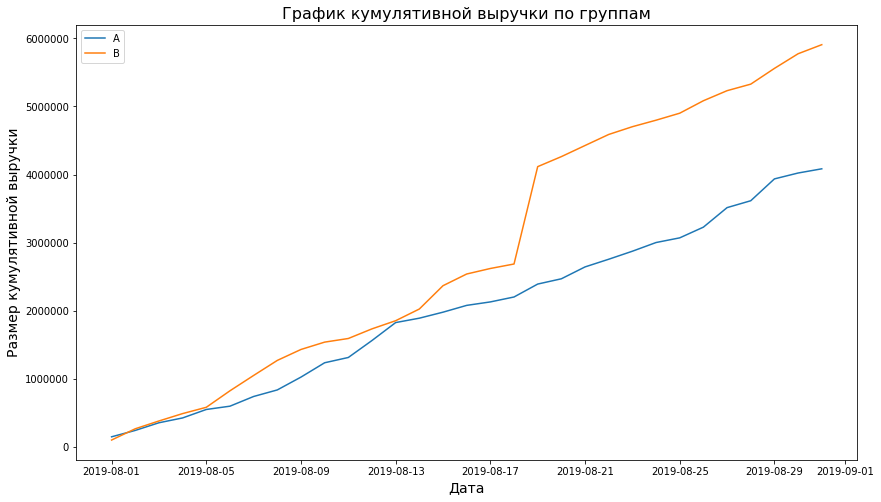

In [33]:
fig, ax = plt.subplots(figsize=(14,8))

plt.plot(data['date'], data['cummulativeRevenueDateA'], label='A')
plt.plot(data['date'], data['cummulativeRevenueDateB'], label='B')

ax.set_title('График кумулятивной выручки по группам', fontsize=16)
ax.set_xlabel('Дата', fontsize=14)
ax.set_ylabel('Размер кумулятивной выручки', fontsize=14)

plt.legend()
plt.show();

### Вывод

Выручка увеличивается в течение теста.

В группе В есть скачок, который может быть вызван выбросами - аномально дорогим заказом или всплеском числа заказов.

Начиная с середины августа график кумулитивной вырочки показывает, что группа В лучше группы А

<a class="anchor" id="2"></a>

#### 2. Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.

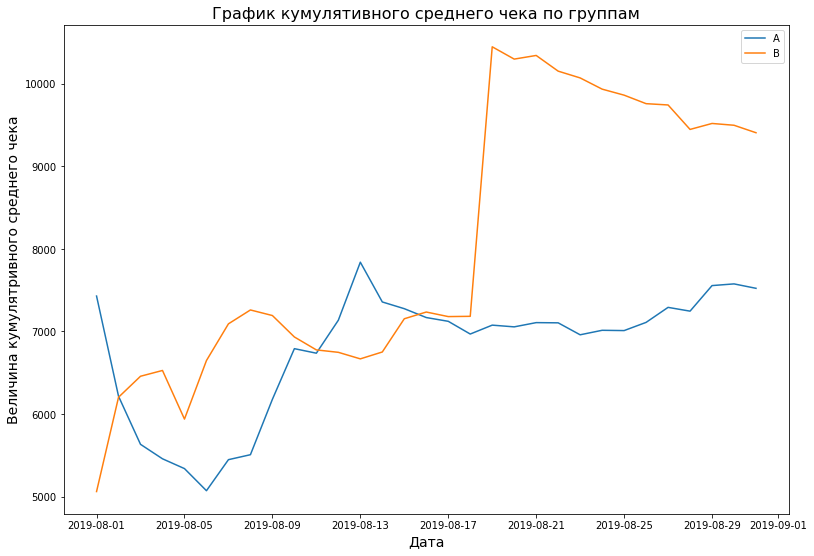

In [34]:
fig, ax = plt.subplots(figsize=(13, 9))


plt.plot(data['date'], data['cummulativeRevenueDateA'] / data['cummulativeOrdersDateA'], label='A')
plt.plot(data['date'], data['cummulativeRevenueDateB'] / data['cummulativeOrdersDateB'], label='B')

ax.set_title('График кумулятивного среднего чека по группам', fontsize=16)
ax.set_xlabel('Дата', fontsize=14)
ax.set_ylabel('Величина кумулятривного среднего чека', fontsize=14)

#plt.axis(['2019-08-01', '2019-08-31', 4000, 15000]) 
plt.legend();

### Вывод

Ближе к концу теста кумулятивный средний чек стал равномерным и установившемся.

Группа В лучше группы А. Главное чтобы этот результат не был получен из-за выбросов.

<a class="anchor" id="3"></a>

#### 3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.

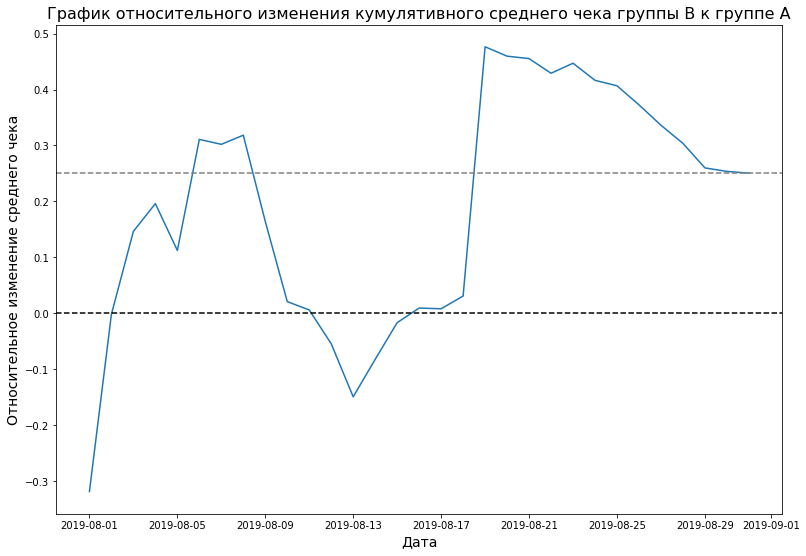

In [35]:
fig, ax = plt.subplots(figsize=(13,9))

plt.plot(data['date'], (data['cummulativeRevenueDateB'] / data['cummulativeOrdersDateB']) / (data['cummulativeRevenueDateA'] / data['cummulativeOrdersDateA']) - 1)

ax.set_title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=16)
ax.set_xlabel('Дата', fontsize=14)
ax.set_ylabel('Относительное изменение среднего чека', fontsize=14)

#plt.axis(['2019-08-01', '2019-08-31', -1, 1.2])
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.25, color='gray', linestyle='--');


### Вывод

Исходя из графика группа В лучше группы А на 25% к концу теста. Но график сильно скачет, поэтому необходимо проанализировать аномалии и выбросы.

<a class="anchor" id="4"></a>

#### 4. Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.

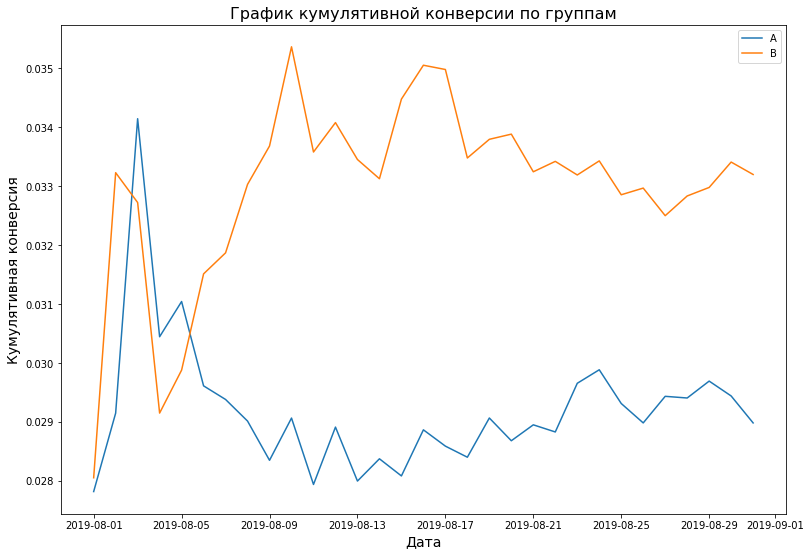

In [36]:
fig, ax = plt.subplots(figsize=(13,9))

plt.plot(data['date'], data['cummulativeConversionA'], label='A')
plt.plot(data['date'], data['cummulativeConversionB'], label='B')

ax.set_title('График кумулятивной конверсии по группам', fontsize=16)
ax.set_xlabel('Дата', fontsize=14)
ax.set_ylabel('Кумулятивная конверсия', fontsize=14)

#plt.axis(["2019-08-01", '2019-08-31', 0.02, 0.04])
plt.legend();


### Вывод

Исходя из графика кумулятивной конверсии группа В лучше группы А почти с начала теста по конверсии. Исходя из графика значения конверсии установились к концу теста.

<a class="anchor" id="5"></a>

#### 5. Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.

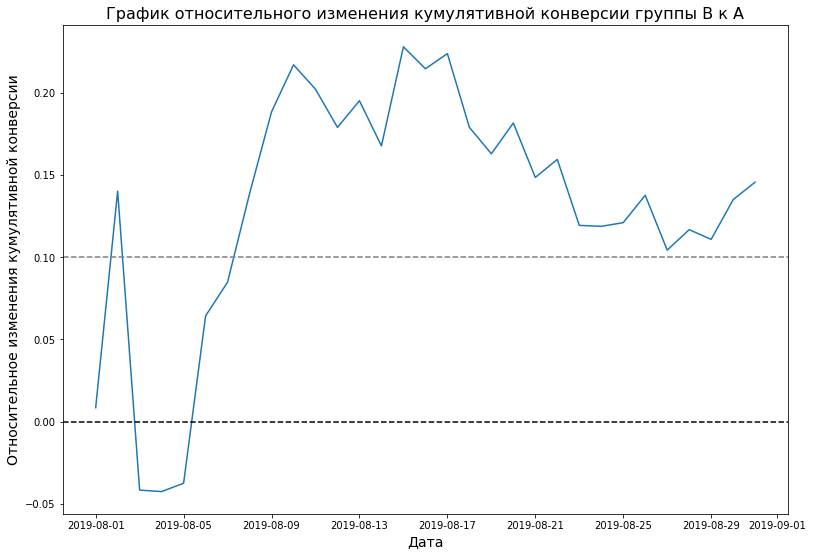

In [37]:
fig, ax = plt.subplots(figsize=(13,9))

plt.plot(data['date'], data['cummulativeConversionB'] / data['cummulativeConversionA'] - 1)

#plt.axis(["2019-08-01", '2019-08-31', -0.1, 0.5])
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='gray', linestyle='--')

ax.set_title('График относительного изменения кумулятивной конверсии группы В к А', fontsize=16)
ax.set_xlabel('Дата', fontsize=14)
ax.set_ylabel('Относительное изменения кумулятивной конверсии', fontsize=14);

### Вывод

График относительного изменения кумулятивной конверсии пока колеблется, хоть и группа В лучше группы А. Кажется, что тест пока останавливать рано.

<a class="anchor" id="6"></a>

#### 6. Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.

In [38]:
orders.head()

,transactionId,userId,order_date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


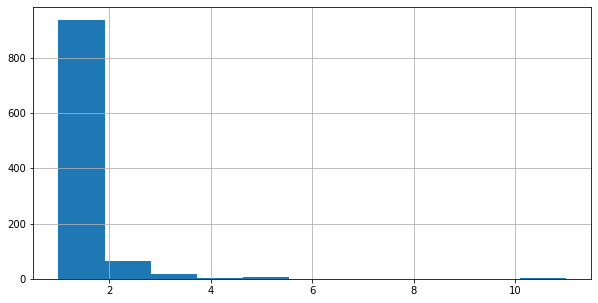

In [39]:
'''Вычислим количество заказов на каждого покупателя'''

orders_by_users = orders.drop(['order_date', 'revenue', 'group'], axis=1)\
                .groupby('userId', as_index=False).agg({'transactionId': pd.Series.nunique})

orders_by_users.columns = ['userId', 'orders']

display(orders_by_users.sort_values(by='orders', ascending=False).head(10))

'''Построим гистограмму количества заказов'''
plt.figure(figsize=(10,5))
orders_by_users['orders'].hist(bins=11)


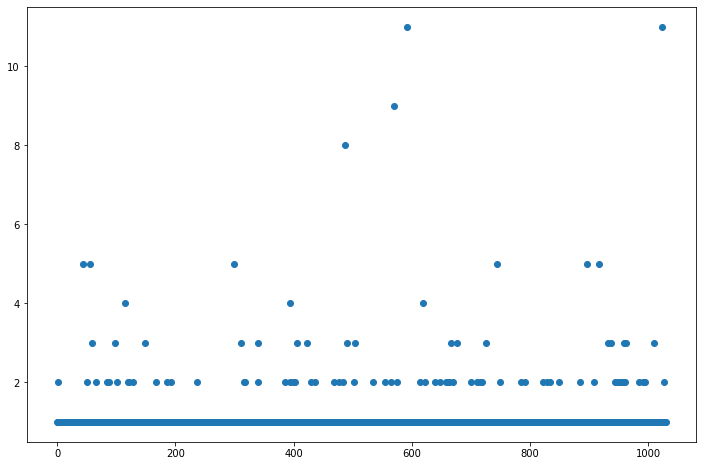

In [40]:
'''Построим диаграмму рассеяния количества заказов на каждого пользователя'''

plt.figure(figsize=(12, 8))
x_value = pd.Series(range(0, len(orders_by_users['orders'])))

plt.scatter(x_value, orders_by_users['orders'])

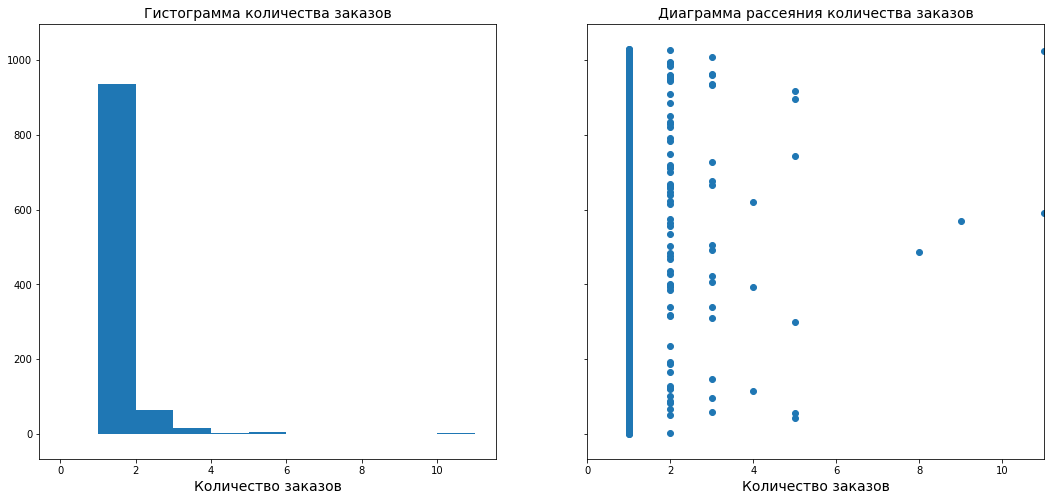

In [41]:
'''Построим гистограмму распределения заказов и диаграмму рассеяния вместе'''

fig, axs = plt.subplots(1, 2, sharey=True)
x_value = pd.Series(range(0, len(orders_by_users['orders'])))
axs[0].hist(orders_by_users['orders'], bins=11, range=(0,11))
axs[1].scatter(orders_by_users['orders'], x_value)

fig.set_figheight(8)
fig.set_figwidth(18)

axs[0].set_title('Гистограмма количества заказов', fontsize=14)
axs[1].set_title('Диаграмма рассеяния количества заказов', fontsize=14)
axs[0].set_xlabel('Количество заказов', fontsize=14)
axs[1].set_xlabel('Количество заказов', fontsize=14)
plt.xlim(0, 11);


### Вывод

Есть некоторые пользователи, которые совершили 11 заказов. Исходя из гистограммы и диаграммы рассеяния можно сделать вывод, что больше трех заказов на одного пользователя - это уже редкое событие.

<a class="anchor" id="7"></a>

#### 7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.

In [42]:
print(np.percentile(orders_by_users['orders'], [90, 95, 99]))

[1. 2. 4.]


### Вывод

1% покупателей совершают 4 и более заказов, 5% покупателей - 2 и более заказа.
Считаю оптимальным выбрать 3 заказа на 1 пользователя - минимальное количество заказов, а тех покупателей, которые совершили больше, считать аномальными. 

<a class="anchor" id="8"></a>

#### 8.Построить точечный график стоимостей заказов. Сделать выводы и предположения.

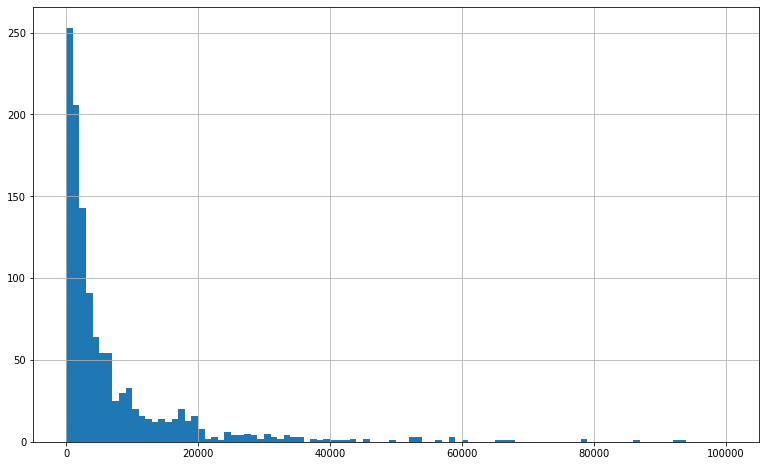

In [43]:
'''Построим гистограмму выручки'''

plt.figure(figsize=(13,8))
orders['revenue'].hist(bins=100, range=(0, 100000))

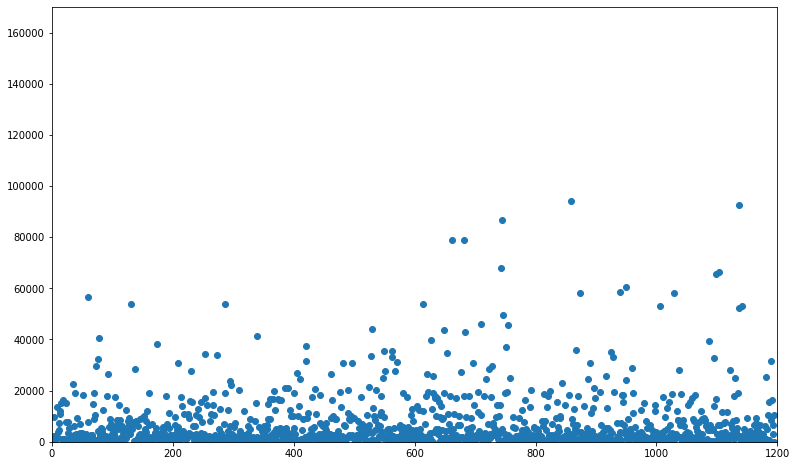

In [44]:
'''Построим диаграмму рассения выручки'''

plt.figure(figsize=(13,8))
plt.axis([0, 1200, 0, 170000])
x_value = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_value, orders['revenue'])

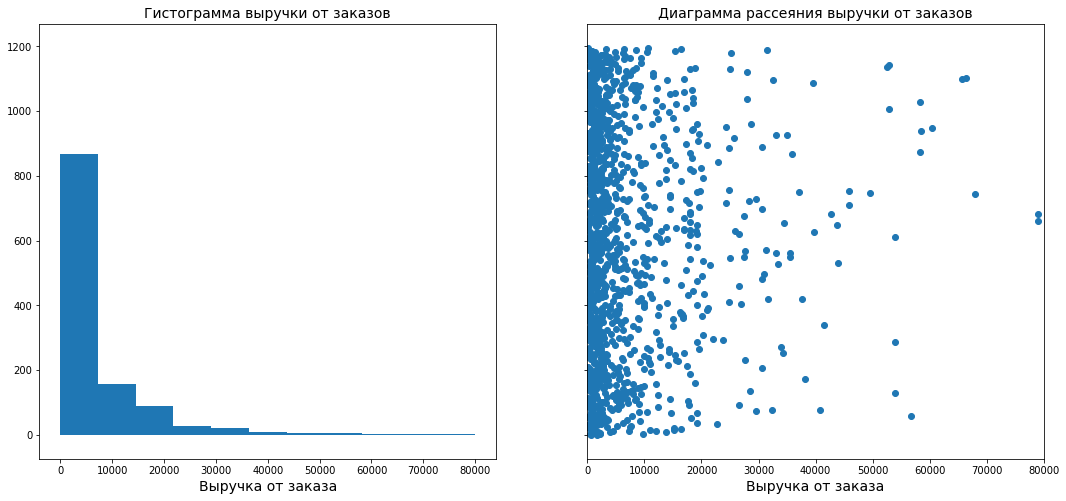

In [45]:
'''Построим гистограмму распределения выручки от заказов и диаграмму рассеяния вместе'''

fig, axs = plt.subplots(1, 2, sharey=True)
x_value = pd.Series(range(0, len(orders['revenue'])))
axs[0].hist(orders['revenue'], bins=11, range=(0, 80000))
axs[1].scatter(orders['revenue'], x_value)

fig.set_figheight(8)
fig.set_figwidth(18)

axs[0].set_title('Гистограмма выручки от заказов', fontsize=14)
axs[1].set_title('Диаграмма рассеяния выручки от заказов', fontsize=14)
axs[0].set_xlabel('Выручка от заказа', fontsize=14)
axs[1].set_xlabel('Выручка от заказа', fontsize=14)
plt.xlim(0, 80000);

### Вывод

Исходя из гистограммы и диаграммы рассеяния величины заказа в зависимости от покупателя видно, что заказы в основном совершают на сумму не более 60 тысяч. Думаю можно будет принять заказы стоимостью более 60 000 за аномальные. 

<a class="anchor" id="9"></a>

#### 9. Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.

In [46]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


### Вывод

Не более 1% покупателей совершают заказы стоимостью более 58 000. Не более 5% совершает покупки стоимость более 28 000. Примем за аномальных пользователей, которые совершили покупку стоимостью более 50 000.

<a class="anchor" id="10"></a>

#### 10. Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.

In [47]:
'''Проверим статистическую значимость различий в конверсии между группами по «сырым» данным'''

'''Гипотеза Н0:
Нет статистически значимого различия в конверсии между группами по "сырым" данным'''

'''Гипотеза Н1:
Есть статистически значимое различие в конверсии между группами по "сырым" данным'''

'''Зададим уровень значимости на уровне 5%'''
alpha = 0.05


'''Для использования критерия Уилкоксона-Манна-Уитни необходимо добавить нули покупателям, которые не совершили заказ'''

orders_by_usersA = orders[orders['group'] == 'A'].groupby('userId', as_index=False)\
                    .agg({'transactionId': pd.Series.nunique})
orders_by_usersA.columns = ['userId', 'orders_per_usersA']

orders_by_usersB = orders[orders['group'] == 'B'].groupby('userId', as_index=False).agg({'transactionId': pd.Series.nunique})
orders_by_usersB.columns = ['userId', 'orders_per_usersB']

sampleA = pd.concat([orders_by_usersA['orders_per_usersA'], \
                    pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(orders_by_usersA['orders_per_usersA'])),\
                              name='orders')], axis=0)

sampleB = pd.concat([orders_by_usersB['orders_per_usersB'], pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(orders_by_usersB['orders_per_usersB'])), name='orders')], axis=0)

pvalue = st.mannwhitneyu(sampleA, sampleB)[1]
print('Статистическая значимость различий конверсии группы по сырым данным: {:.5f}'.format(pvalue))
print()

if (pvalue < alpha):
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
print()
    
          
print('Относительный прирост конверсии группы B по отношению к группе А по сырым данным: {:.2%}'.format(sampleB.mean() / sampleA.mean() - 1))


Статистическая значимость различий конверсии группы по сырым данным: 0.00840

Отвергаем нулевую гипотезу: разница статистически значима

Относительный прирост конверсии группы B по отношению к группе А по сырым данным: 13.81%


In [48]:
orders_by_usersA.head(10)

,userId,orders_per_usersA
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1
5,85103373,1
6,87885904,1
7,109615108,1
8,130417038,1
9,132143192,1


In [49]:
sampleA.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
dtype: int64

In [50]:
orders_by_usersA['orders_per_usersA'].head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: orders_per_usersA, dtype: int64

### Вывод

Статистически по "сырым" данным можно сделать вывод, что есть различие в конверсии между группами. Относительный прирост конверсии группы В к группе А значителен и равен 13,81%.

<a class="anchor" id="11"></a>

#### 11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.

In [51]:
'''Посчитаем статистическую значимость различий в среднем чеке по сырым данным'''

'''Гипотеза Н0:
Нет статистически значимого различия в среднем чеке заказа между группами по "сырым" данным'''

'''Гипотеза Н1:
Есть статистически значимое различие в среднем чеке заказа между группами по "сырым" данным'''

'''Зададим уровень значимости на уровне 5%'''
alpha = 0.05

pvalue = st.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]

print('Cтатистическая значимость различий в среднем чеке по "сырым" данным равна: {:.5f}'.format(pvalue))
print()

if (pvalue < alpha):
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
print()
    
          
print('Относительный прирост среднего чека группы B по отношению к группе А по сырым данным: {:.2%}'.format(orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean() - 1))


Cтатистическая значимость различий в среднем чеке по "сырым" данным равна: 0.36465

Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя

Относительный прирост среднего чека группы B по отношению к группе А по сырым данным: 25.87%


### Вывод

Статистически по "сырым" данным сделать вывод о различии среднего чека между группами В и А нельзя, несмотря на относительный прирост группы В к группе А в размере более 25%.

<a class="anchor" id="12"></a>

#### 12. Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.

In [52]:
'''Очистим данные от аномальных пользователей - покупателей с заказами более 3-х и стоимостью заказа более 50 000'''

usersWithManyOrders = pd.concat([orders_by_usersA[orders_by_usersA['orders_per_usersA'] > 3]['userId'],\
                                 orders_by_usersB[orders_by_usersB['orders_per_usersB'] > 3]['userId']], axis=0)

usersWithExpensiveOrders = orders[orders['revenue'] > 50000]['userId']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()

In [53]:
abnormalUsers

1099     148427295
18       199603092
23       237748145
1137     759473111
949      887908475
744      888512513
1103    1164614297
1136    1307669133
858     1316129916
425     1920142716
227     2038680547
1196    2108080724
287     2254456485
131     2254586615
1006    2261934787
269     2378935119
278     2458001652
1142    2606908679
424     3062433592
501     3717692402
514     3803269165
613     3931967268
940     4003628586
743     4133034833
499     4256040402
662     4266935830
Name: userId, dtype: int64

In [54]:
'''Посчитаем статистическую значимость различий конверсии группы В и группы А по "очищенным" данным"'''

'''Гипотеза Н0:
Нет статистически значимого различия в конверсии группы В и группы А по "очищенным" данным"'''

'''Гипотеза Н1:
Есть статистически значимое различие в конверсии группы В и группы А по "очищенным" данным'''

'''Зададим уровень значимости на уровне 5%'''
alpha = 0.05

sampleA_clear = pd.concat([orders_by_usersA[np.logical_not(orders_by_usersA['userId'].isin(abnormalUsers))]['orders_per_usersA'],\
                          pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(orders_by_usersA['orders_per_usersA'])),\
                                    name='orders')], axis=0)

sampleB_clear = pd.concat([orders_by_usersB[np.logical_not(orders_by_usersB['userId'].isin(abnormalUsers))]['orders_per_usersB'],\
                          pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(orders_by_usersB['orders_per_usersB'])),\
                                    name='orders')], axis=0)

pvalue = st.mannwhitneyu(sampleA_clear, sampleB_clear)[1]
print('Статистическая значимость различий конверсии группы В и группы А по "очищенным" данным: {:.5f}'.format(pvalue))
print()

if (pvalue < alpha):
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
print()
    
          
print('Относительный прирост конверсии группы B по отношению к группе А по "очищенным" данным: {:.2%}'.format(sampleB_clear.mean() / sampleA_clear.mean() - 1))


Статистическая значимость различий конверсии группы В и группы А по "очищенным" данным: 0.00572

Отвергаем нулевую гипотезу: разница статистически значима

Относительный прирост конверсии группы B по отношению к группе А по "очищенным" данным: 15.83%


### Вывод

Статистически по "очищенным" данным различие в конверсии есть, также как и по "сырым" данным. Разница в относительном приросте конверсии группы В к группе А увеличилась по сравнению с разницей по "сырым" данным и стала 15,83%.

<a class="anchor" id="13"></a>

#### 13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.

In [55]:
'''Посчитаем статистическую значимость различий среднего чека группы В и группы А по "очищенным" данным"'''

'''Гипотеза Н0:
Нет статистически значимого различия в среднем чеке заказа между группами по "очищенным" данным"'''

'''Гипотеза Н1:
Есть статистически значимое различие в среднем чеке заказа между группами по "очищенным" данным'''

'''Зададим уровень значимости на уровне 5%'''
alpha = 0.05

pvalue = st.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['userId'].isin(abnormalUsers)))]\
                         ['revenue'],\
                         orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['userId'].isin(abnormalUsers)))]\
                         ['revenue'])[1]

print('Cтатистическая значимость различий в среднем чеке по "очищенным" данным" равна: {:.5f}'.format(pvalue))
print()

if (pvalue < alpha):
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
print()
    
          
print('Относительный прирост среднего чека группы B по отношению к группе А по "очищенным" данным: {:.2%}'\
      .format(orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'].mean()\
              / orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'].mean() - 1))


Cтатистическая значимость различий в среднем чеке по "очищенным" данным" равна: 0.40944

Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя

Относительный прирост среднего чека группы B по отношению к группе А по "очищенным" данным: 2.36%


### Вывод

Статистически по "очищенным" данным вывод о различии в среднем чеке сделать нельзя, также как и по "сырым" данным. После удаления аномальных покупок разница в относительном приросте среднего чека группы В к группе А уменьшилась с 25,87% до 2,36%, поэтому можно также сделать вывод, что различий между группами по среднему чеку нет.

<a class="anchor" id="14"></a>

### Общий вывод

14.	Принять решение по результатам теста и объяснить его. 
    Варианты решений: 
    - 1. Остановить тест, зафиксировать победу одной из групп. 
    - 2. Остановить тест, зафиксировать отсутствие различий между группами. 
    - 3. Продолжить тест.
    
    
#### По "сырым" данным:

##### Конверсия:

Статистическая значимость различий конверсии группы по сырым данным: 0.00840

Отвергаем нулевую гипотезу: разница статистически значима

Относительный прирост конверсии группы B по отношению к группе А по сырым данным: 13.81%

##### Средний чек:

Cтатистическая значимость различий в среднем чеке равна: 0.36465

Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя

Относительный прирост среднего чека группы B по отношению к группе А: 25.87%


#### По "очищенным" данным:

##### Конверсия:

Статистическая значимость различий конверсии группы В и группы А по "очищенным" данным: 0.00572

Отвергаем нулевую гипотезу: разница статистически значима

Относительный прирост конверсии группы B по отношению к группе А по "очищенным" данным: 15.83%

##### Средний чек:

Cтатистическая значимость различий в среднем чеке по "очищенным" данным" равна: 0.40944

Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя

Относительный прирост среднего чека группы B по отношению к группе А по "очищенным" данным: 2.36%

#### Графики относительного изменения группы В к группе А

График относительного изменения кумулятивной конверсии пока колеблется, хоть и группа В лучше группы А.

Исходя из графика относительного изменения кумулятивного среднего чека группа В лучше группы А на 25% к концу теста. Но график сильно скачет.


По конверсии группа В лучше группы А по "сырым" и по "очищенным" данным. Относительный прирост более 10%.

По среднему чеку по "сырым" и по "очищенным" данным статистически значимых различий меду группой В и группой А нет.


Думаю, что исходя из графика относительного изменения конверсии можно сделать вывод, что группа В лучше группы А.

График относительного изменения среднего чека на мой взгляд еще не установился, но статистически группа В не лучше группы А по среднему чека.

Тест можно останавливать и признать, что группа В лучше группы А по показателю конверсии, но между группами нет различий по показателю среднего чека.
